### Aisya Mufidah Najwa/1206230026/DS-03-01

## 1. Pemahaman Masalah (Problem Understanding)
Pertanyaan Kunci: Bagaimana kita dapat memprediksi apakah pinjaman seseorang akan disetujui berdasarkan karakteristik pemohon dan pinjaman yang diajukan?
Metrik Utama: Akurasi, Precision, Recall, dan F1-score.

## 2. Pengumpulan Data (Data Collection)
Dataset telah disediakan dalam file CSV yang berisi informasi tentang karakteristik pemohon pinjaman, riwayat kredit, dan status persetujuan pinjaman.

In [428]:
# mengimpor library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [429]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## 3. Eksplorasi Data (Data Exploration)
Memeriksa distribusi variabel numerik (ApplicantIncome, LoanAmount, dll.) dan kategorikal (Gender, Married, dll.).
Menghitung statistik deskriptif untuk memahami karakteristik data.
Visualisasi distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman.

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [431]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Data loan memiliki rentang nilai yang besar dan perbedaan skala yang besar

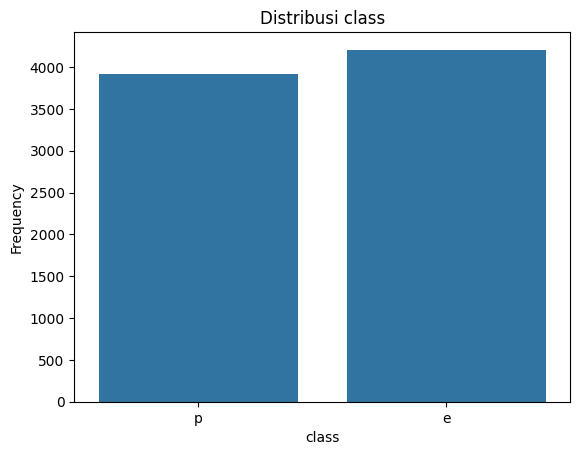

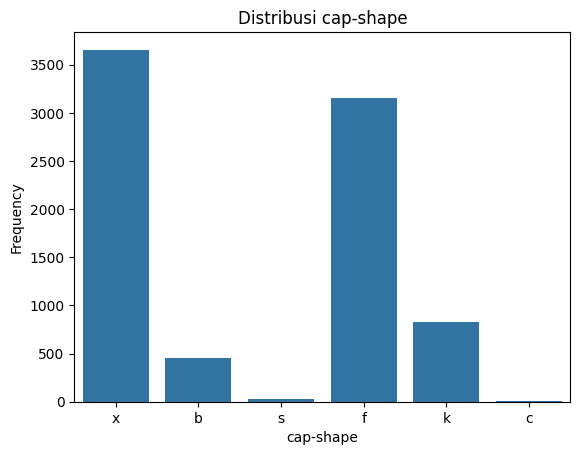

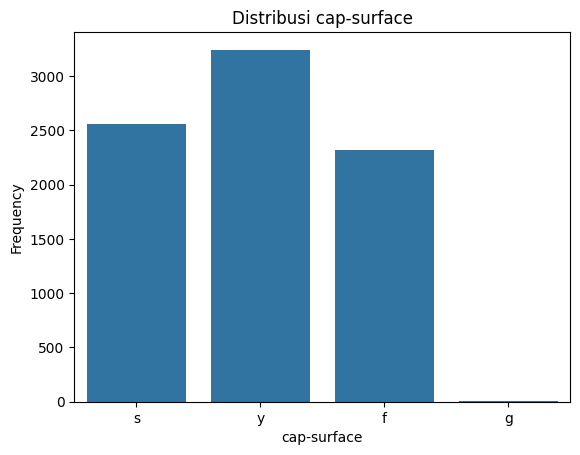

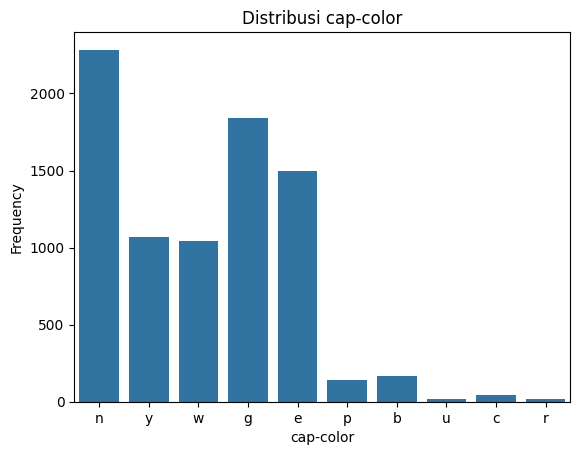

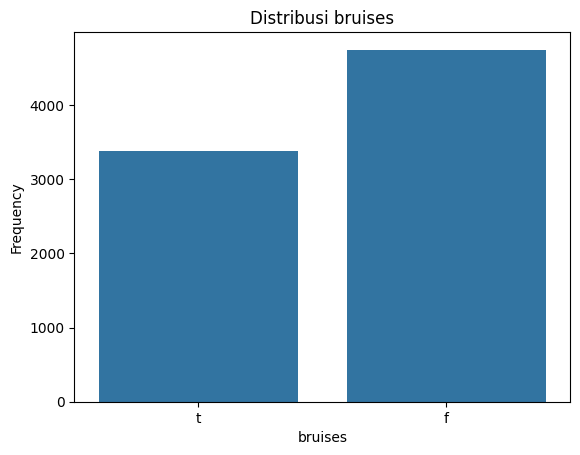

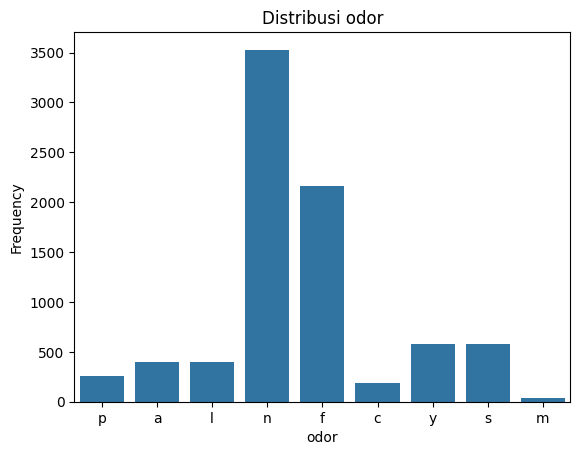

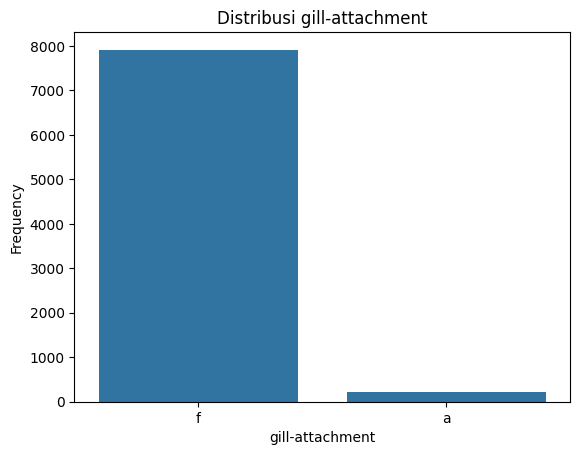

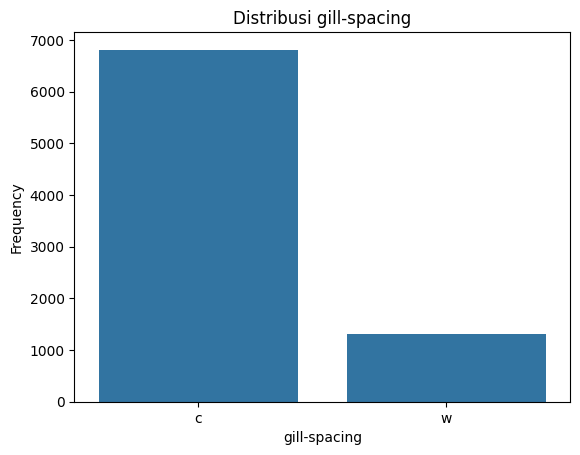

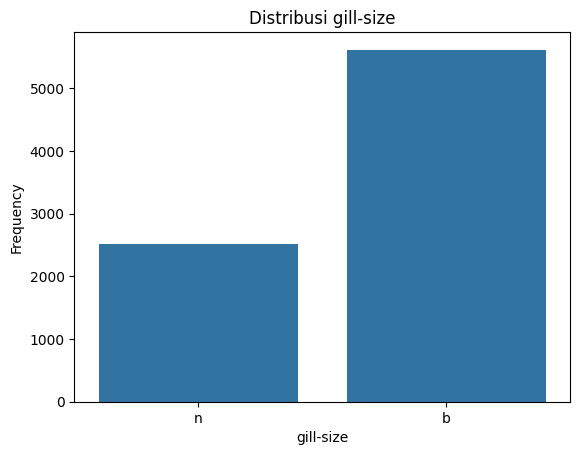

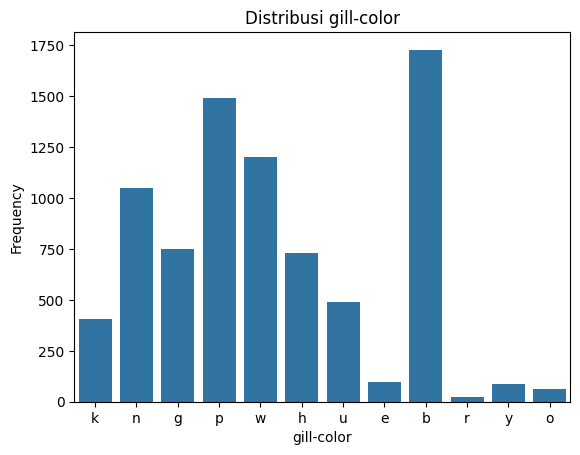

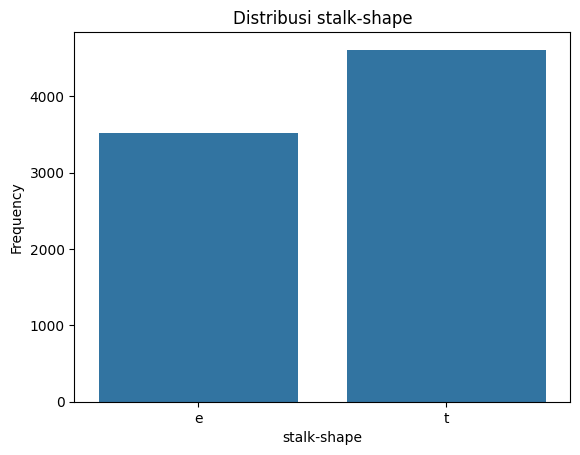

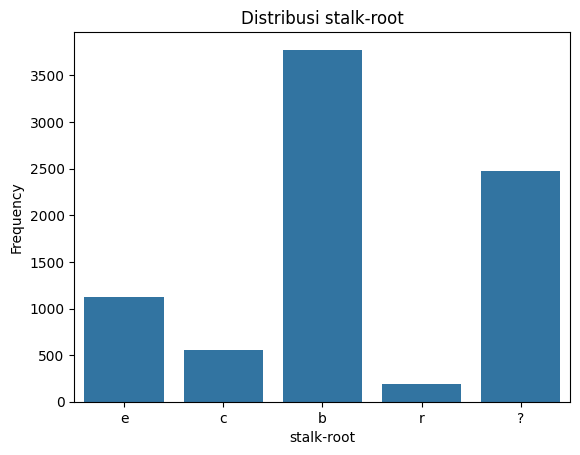

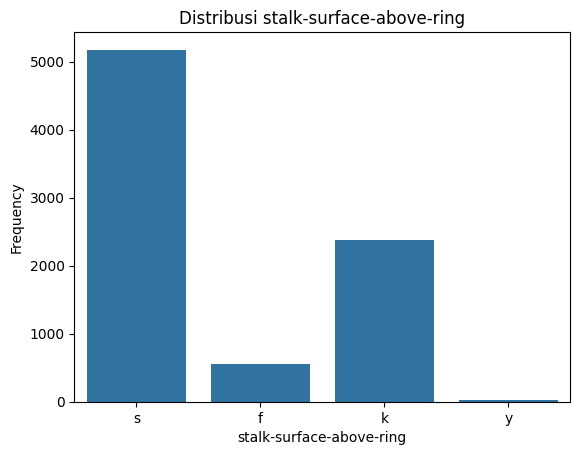

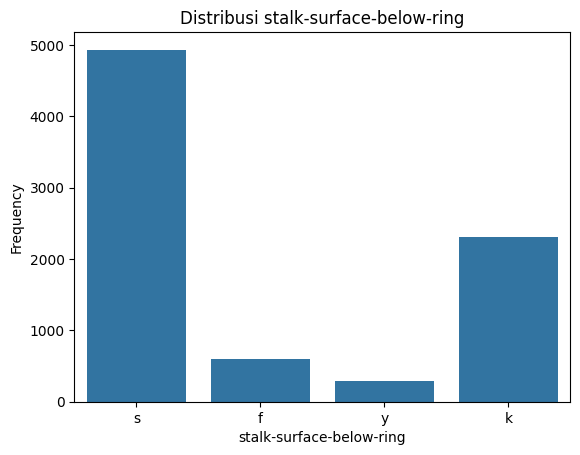

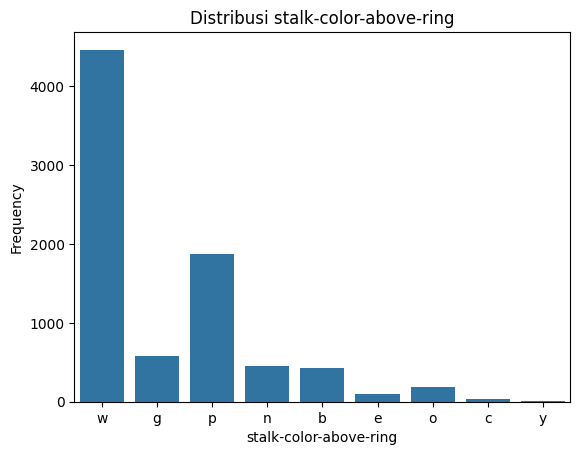

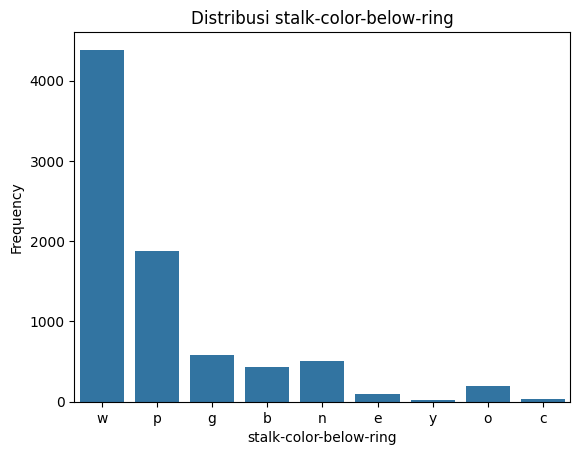

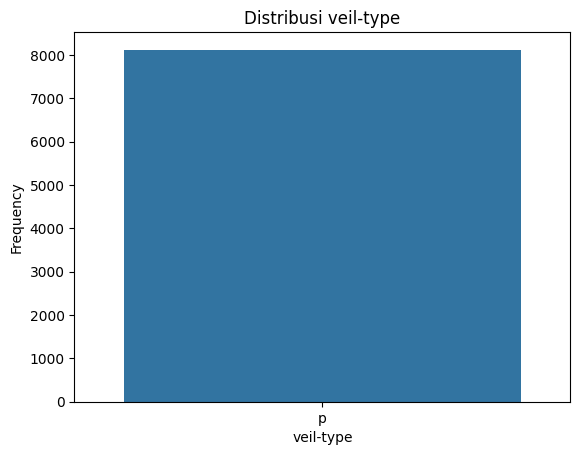

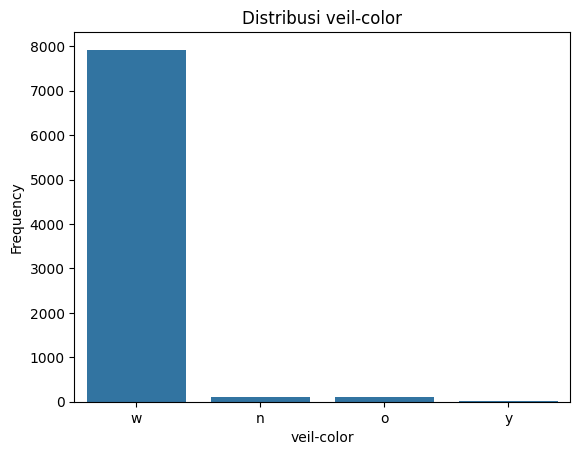

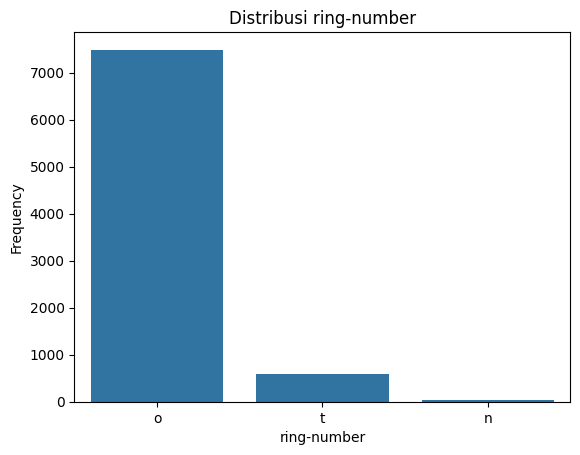

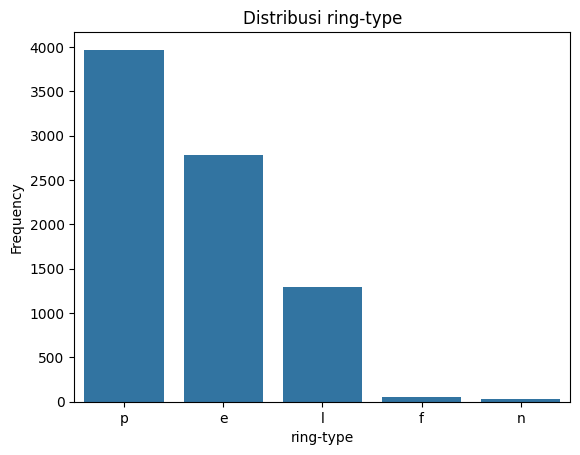

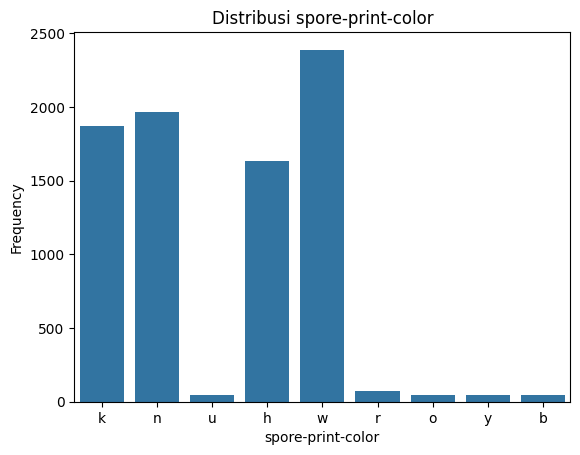

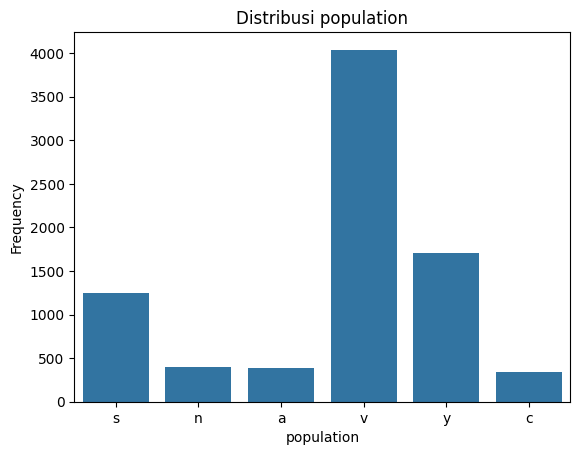

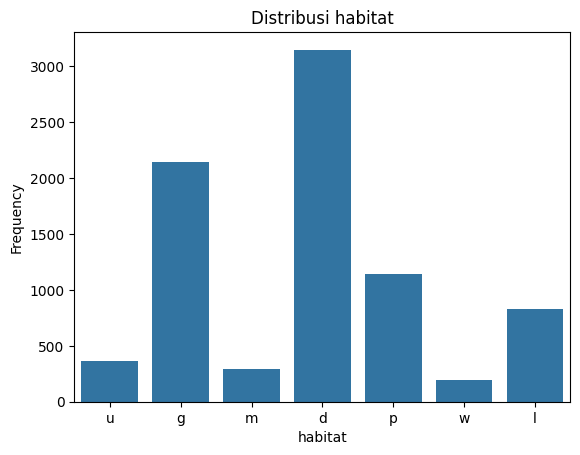

In [432]:
# Menggunakan 5 kolom pertama dari dataset mushroom
columns = df.columns

for col in columns:
    sns.countplot(x=df[col])
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

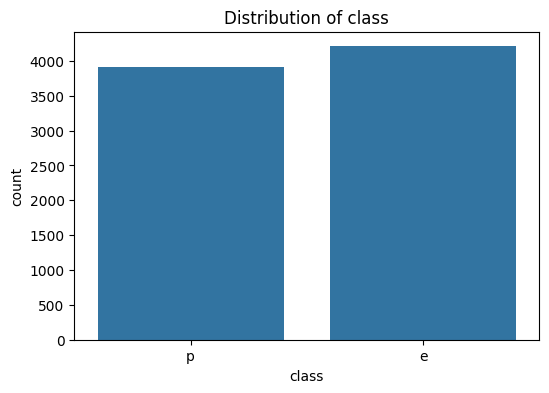

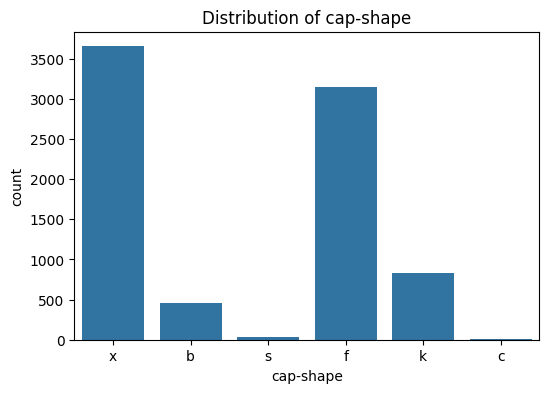

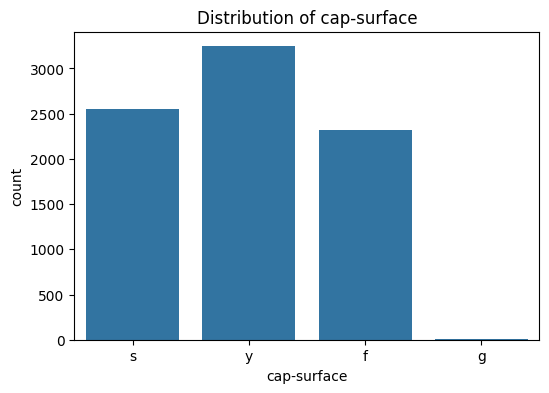

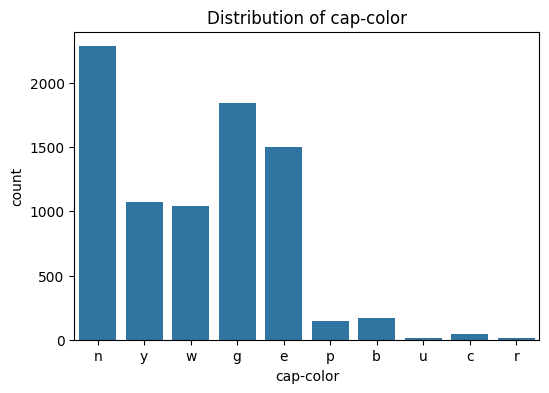

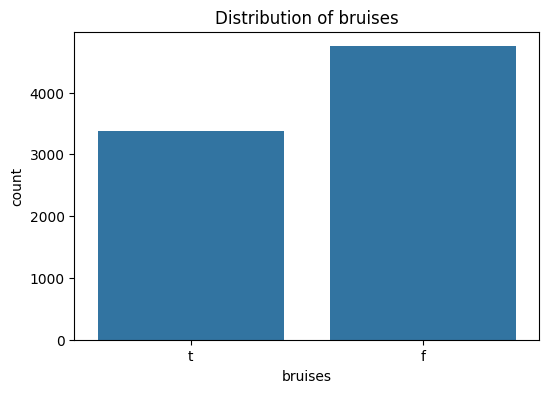

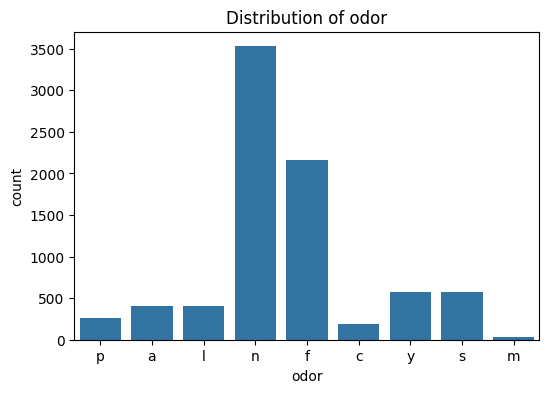

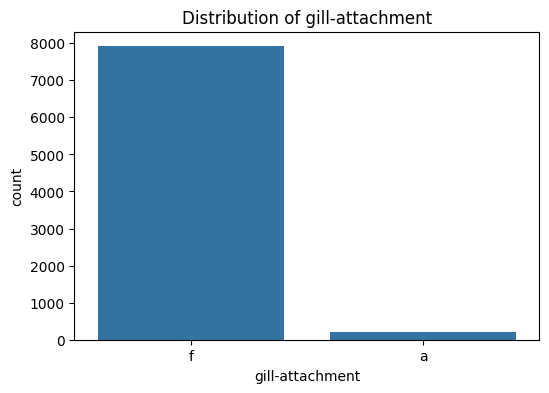

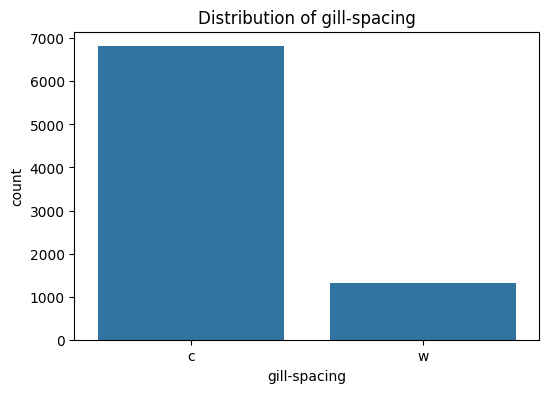

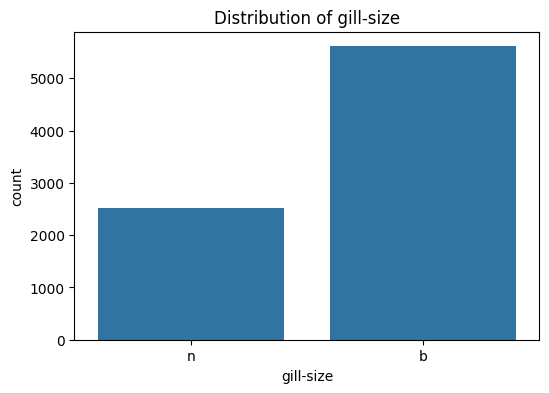

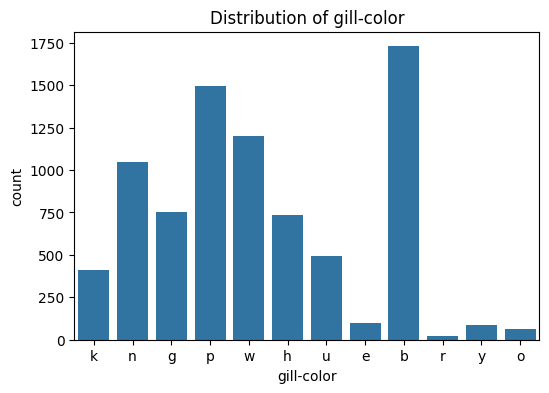

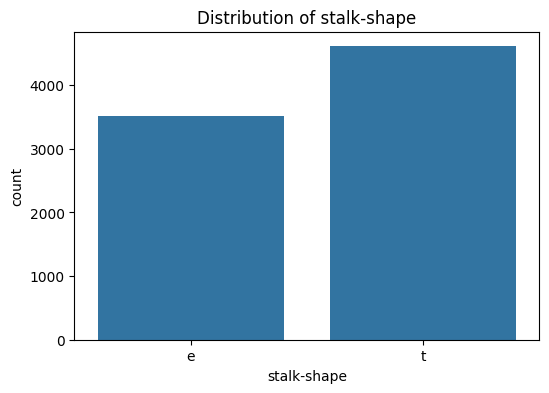

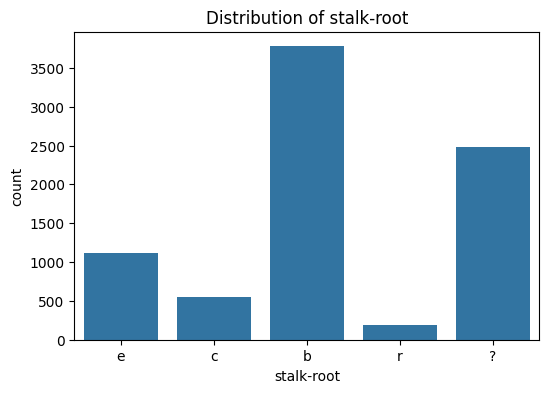

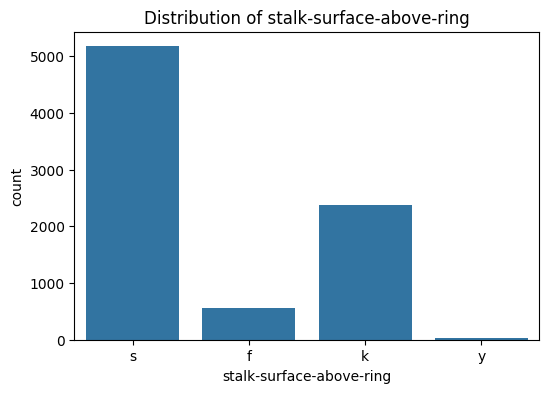

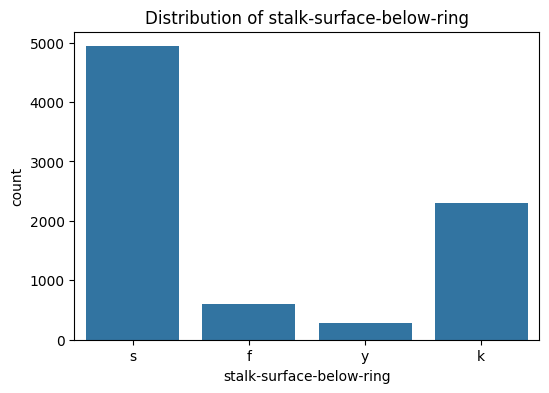

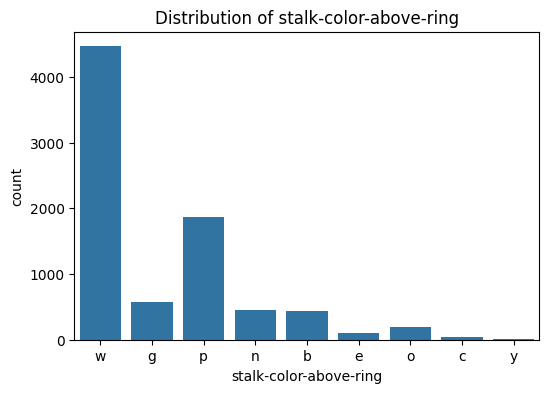

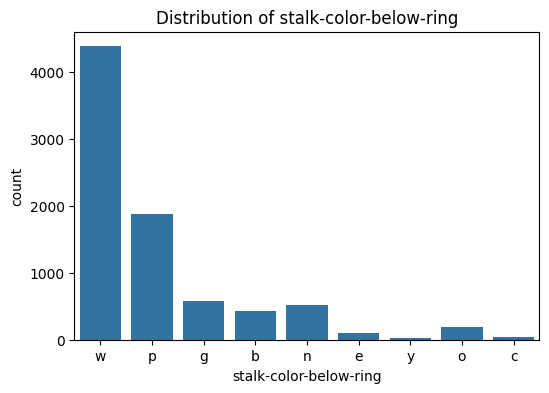

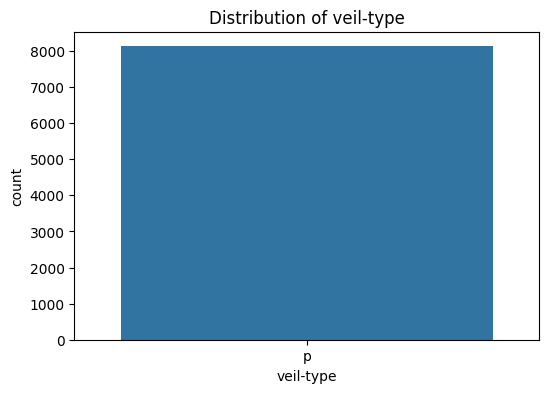

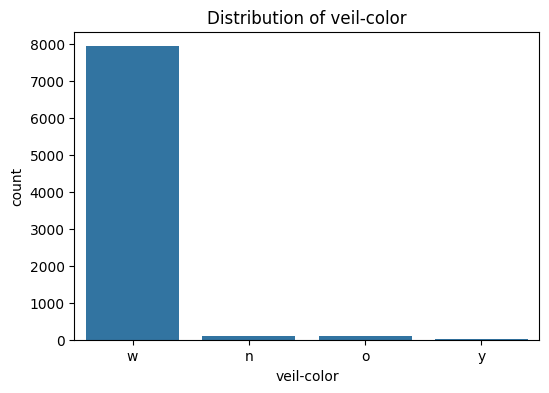

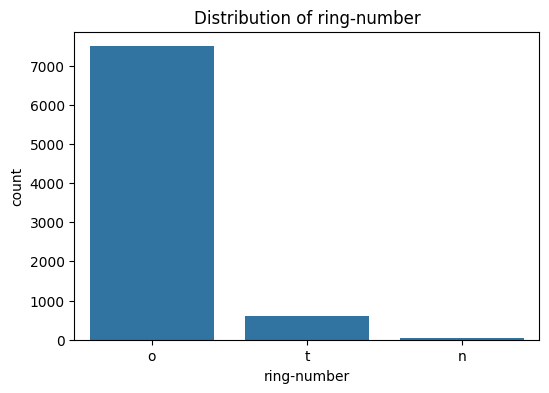

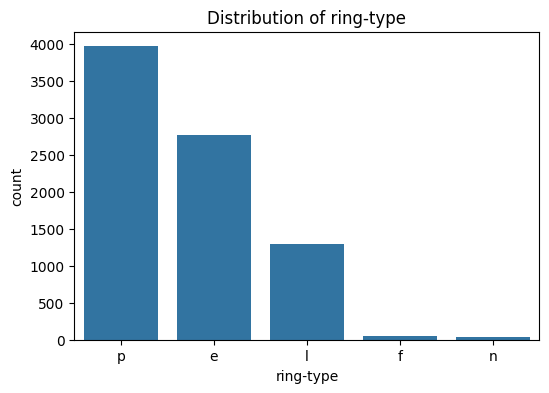

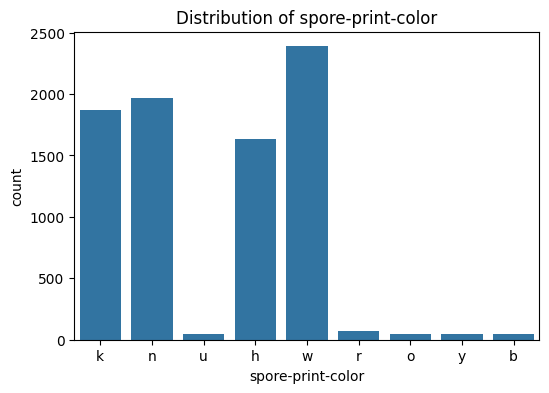

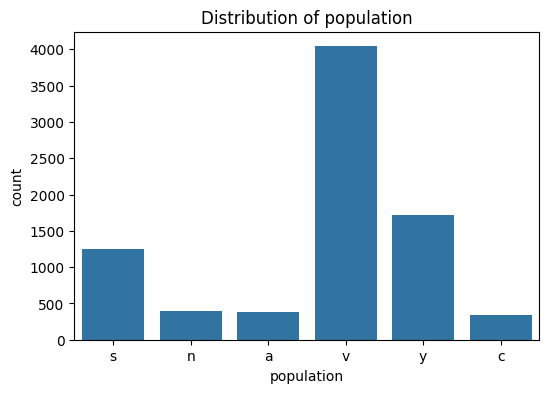

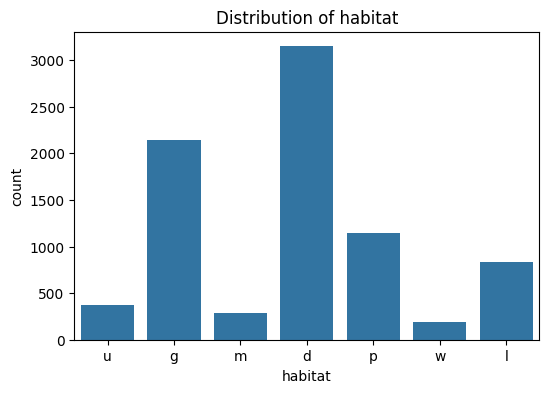

In [433]:
# Use the first 5 columns of the mushroom dataset as categorical variables
categorical = df.columns

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

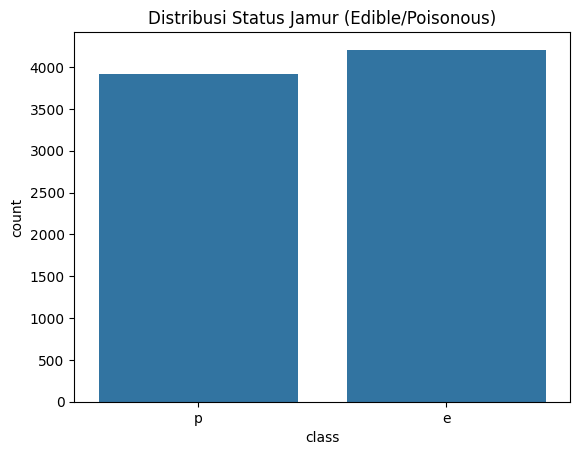

In [434]:
sns.countplot(x='class', data=df)
plt.title('Distribusi Status Jamur (Edible/Poisonous)')
plt.show()

Banyak pemohon yang disetujui peminjamannya

### Variabel Kategorikal
distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18004\1927813260.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='class')


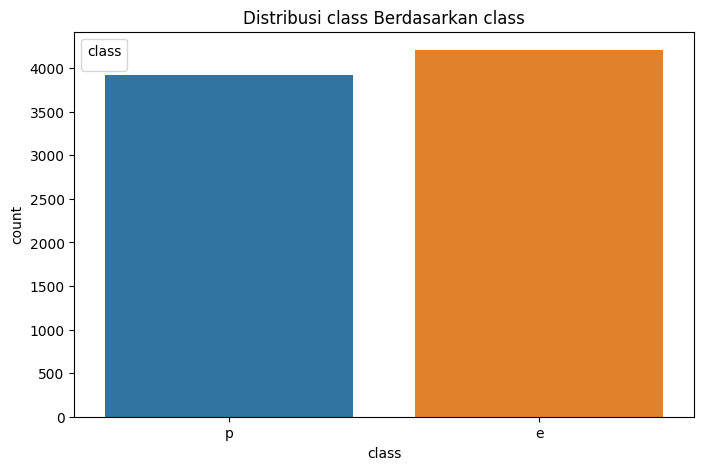

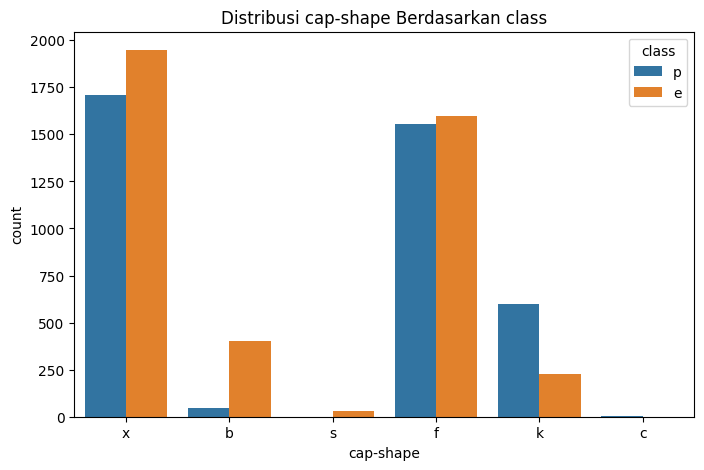

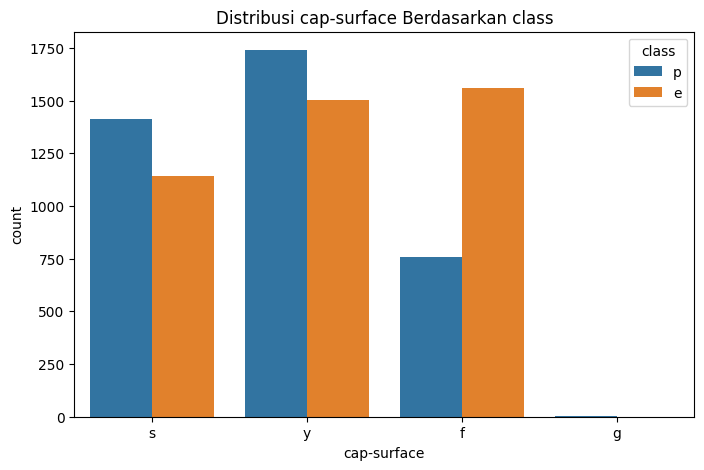

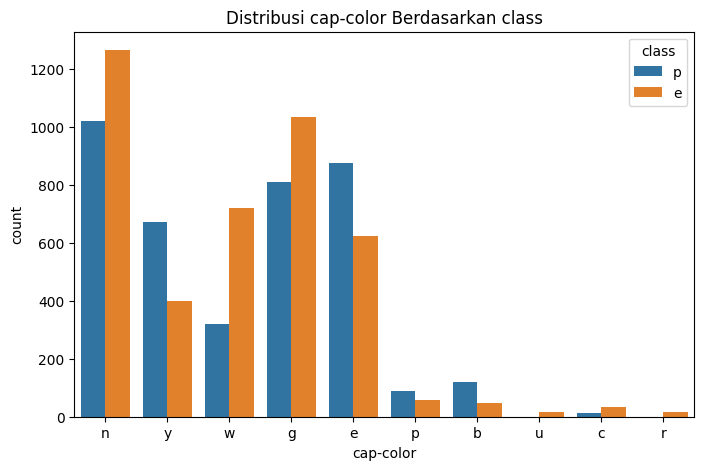

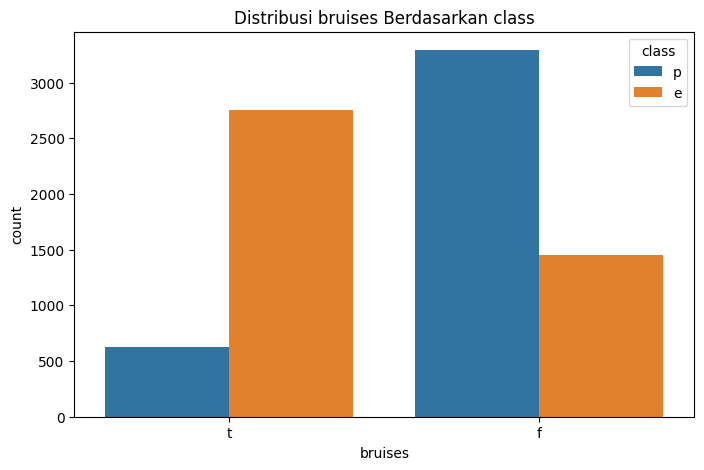

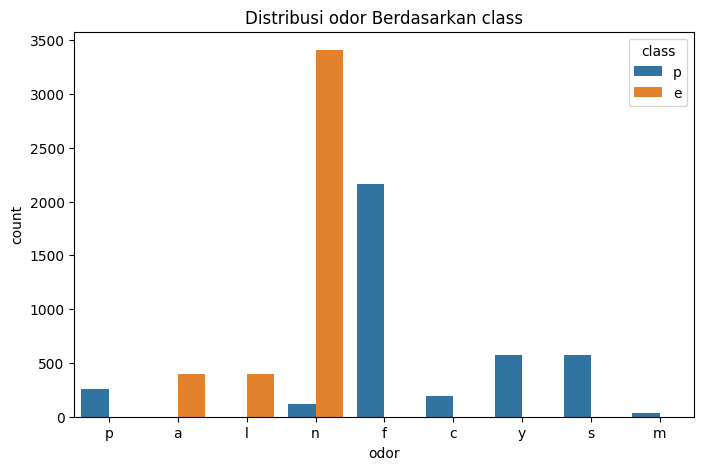

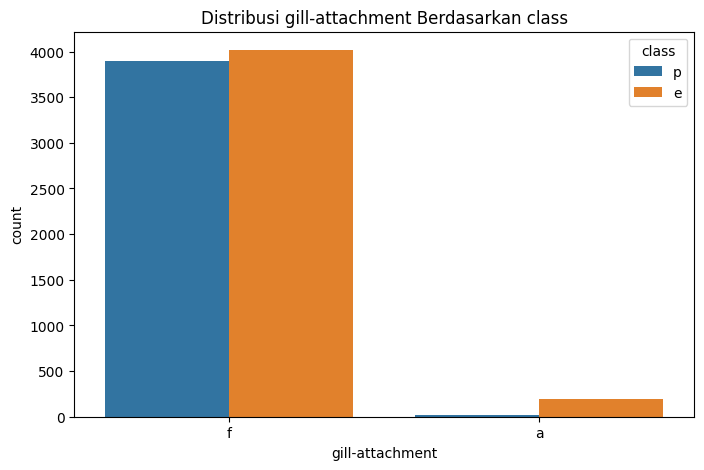

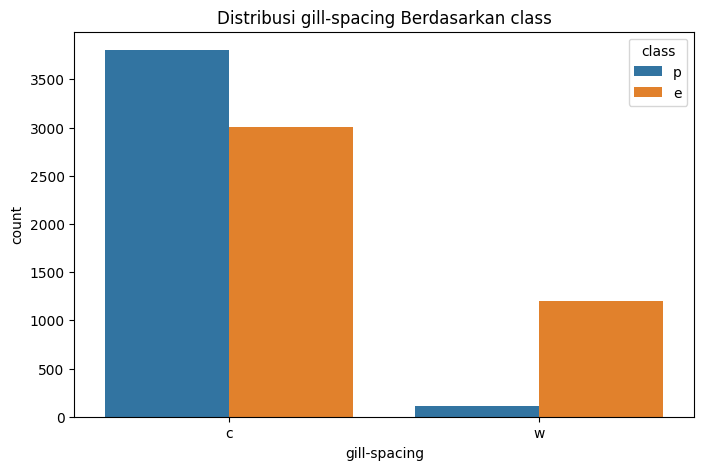

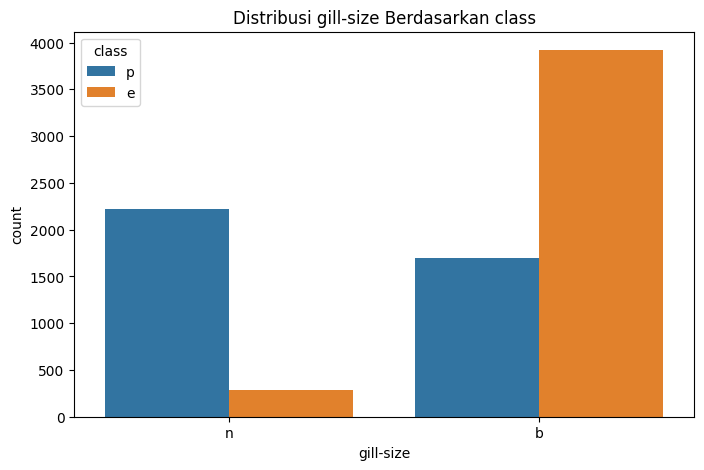

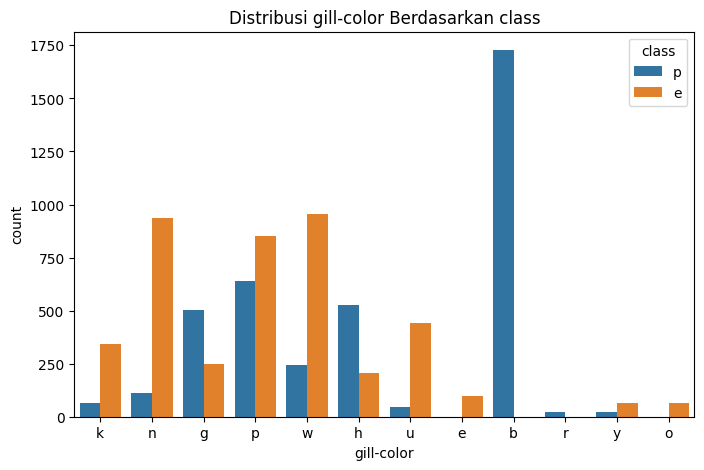

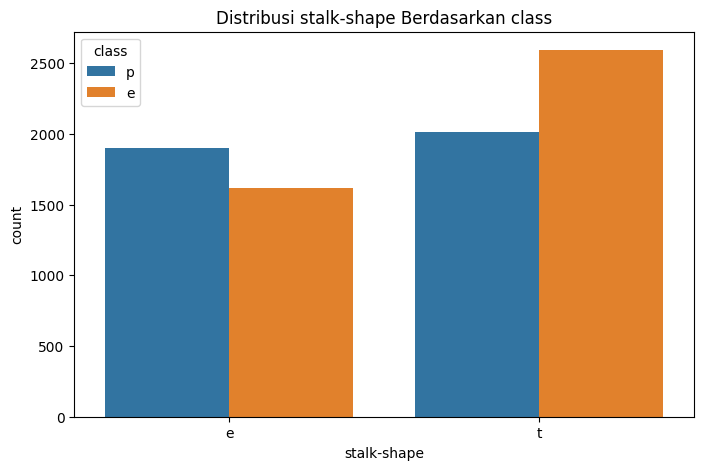

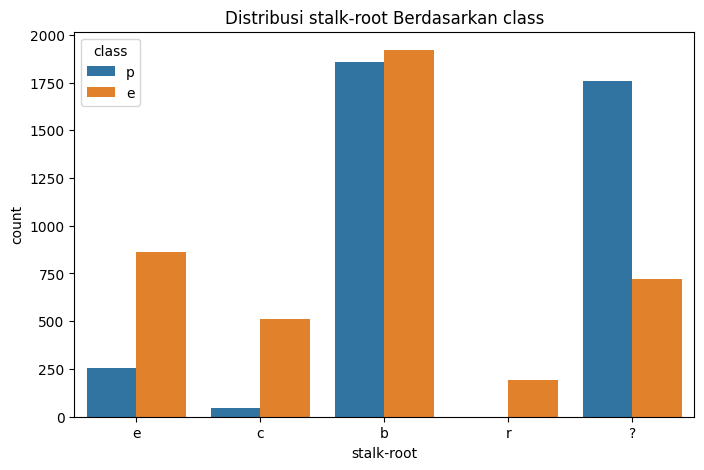

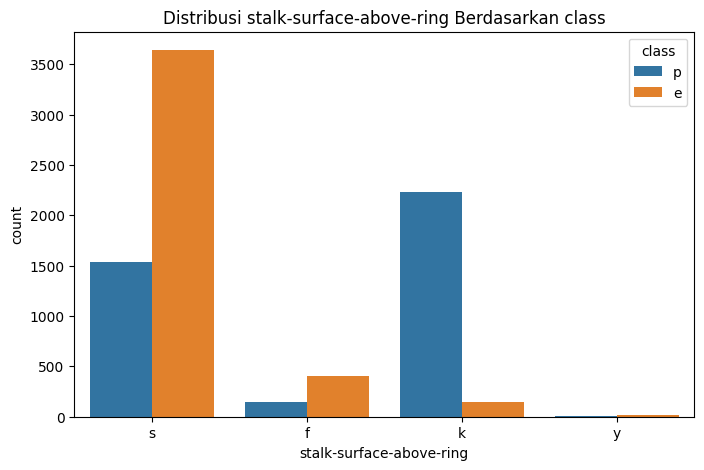

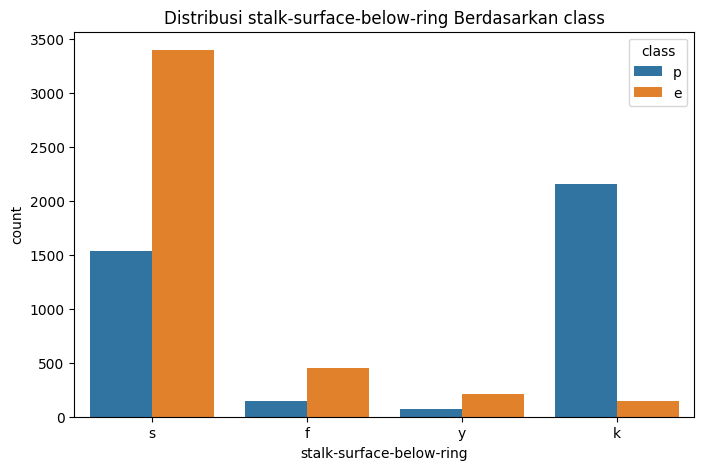

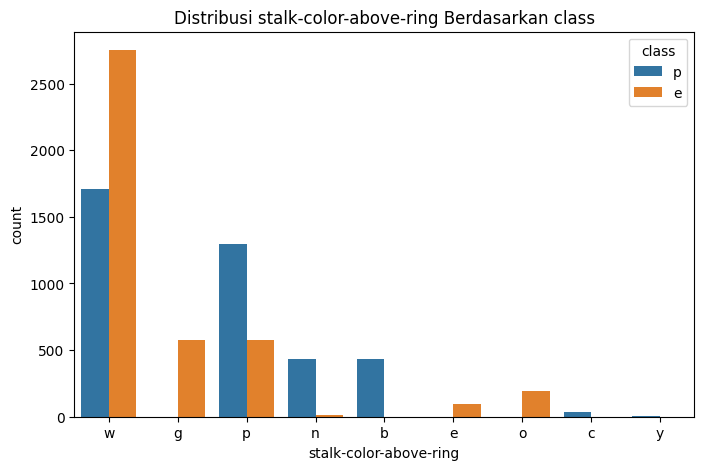

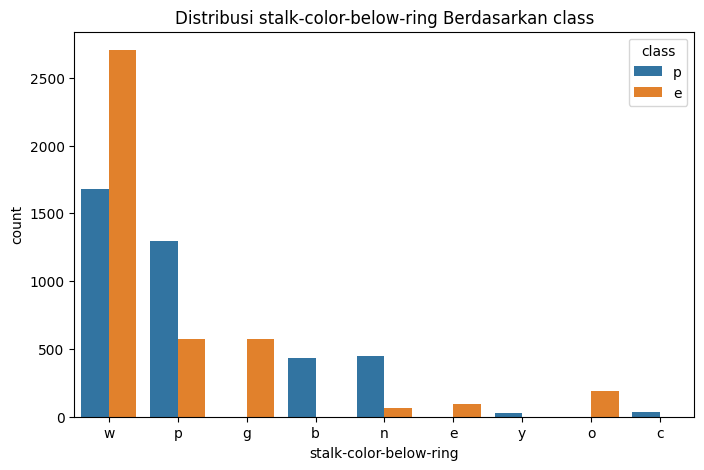

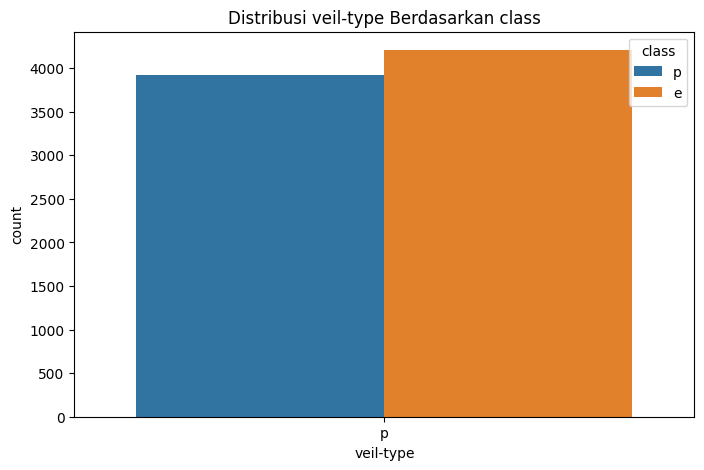

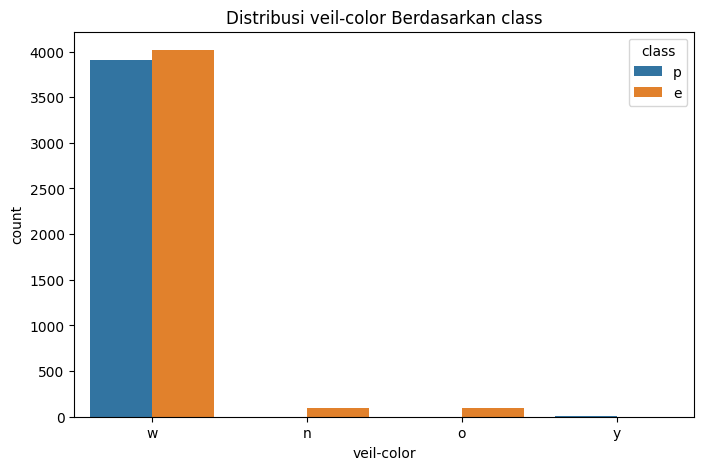

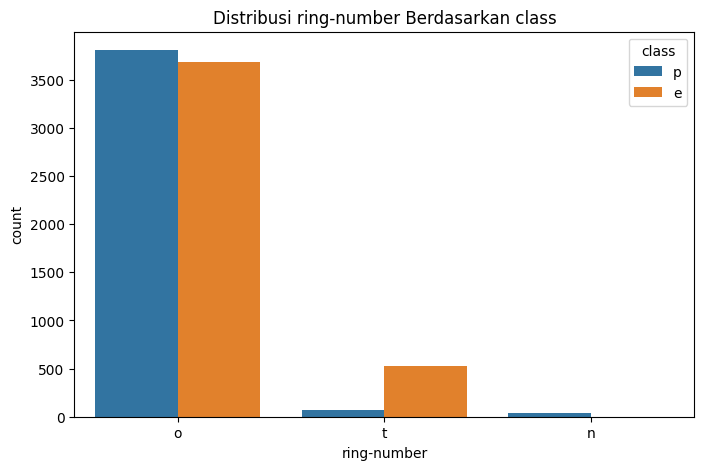

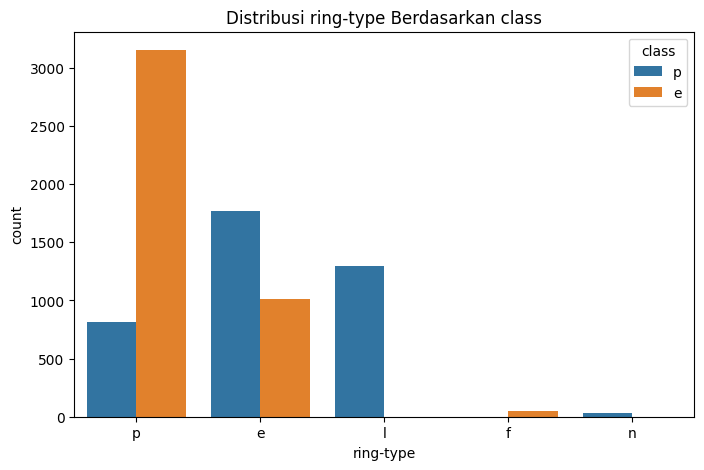

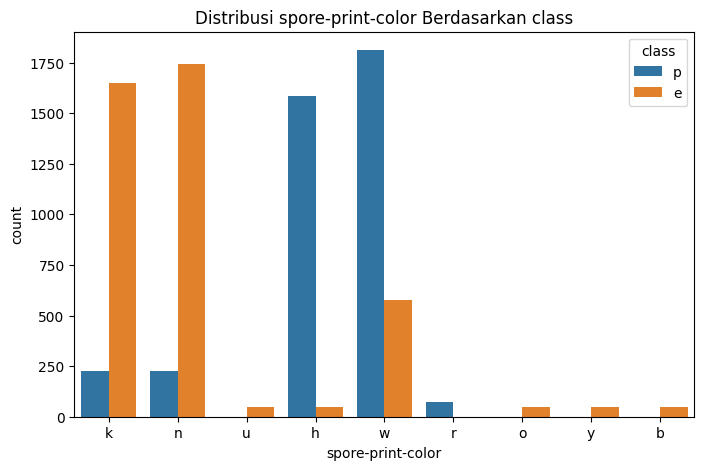

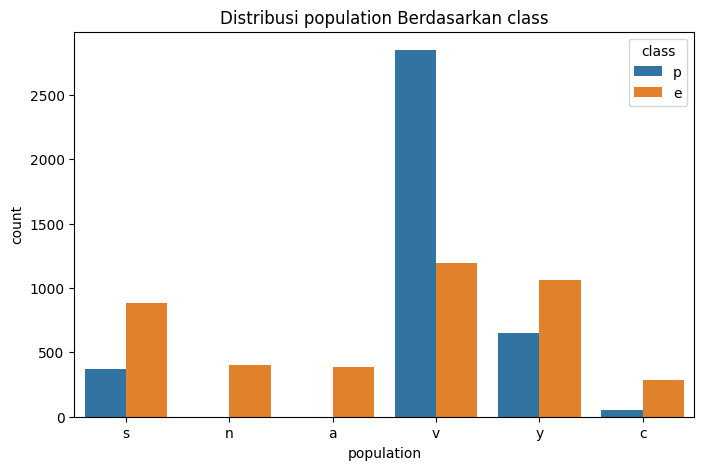

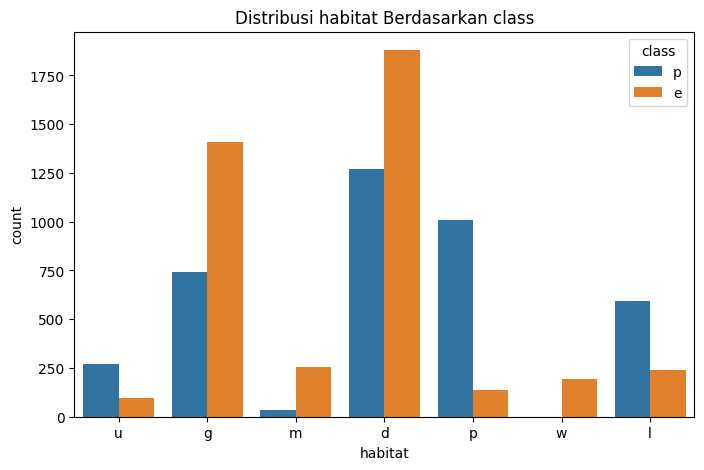

In [435]:
for col in categorical:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'Distribusi {col} Berdasarkan class')
    plt.legend(title='class')
    plt.show()

Credit History saya masukkan kategori karena hanya berisi 0 dan 1,
 
-1 artinya pemohon memiliki riwayat kredit yang baik atau memenuhi syarat

-0 berarti pemohon memiliki riwayat kredit yang buruk atau bermasalah, seperti yang bisa dilihat di grafik, 0 cenderung lebih banyak ditolak karena dianggap lebih berisiko. 

### Variabel Numerik
distribusi status pinjaman dan hubungan antara variabel prediktor dengan status pinjaman

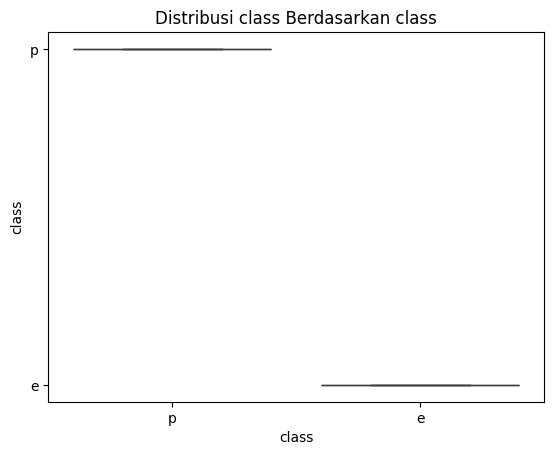

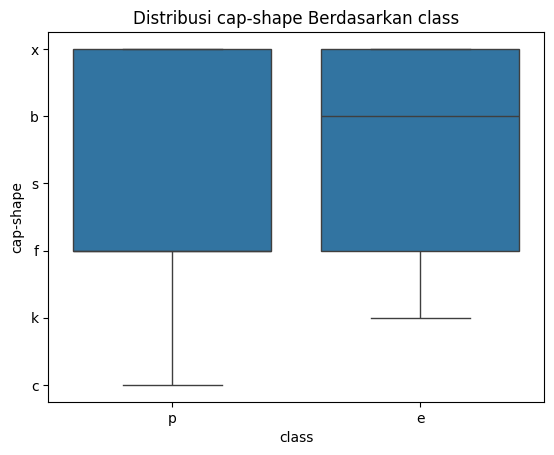

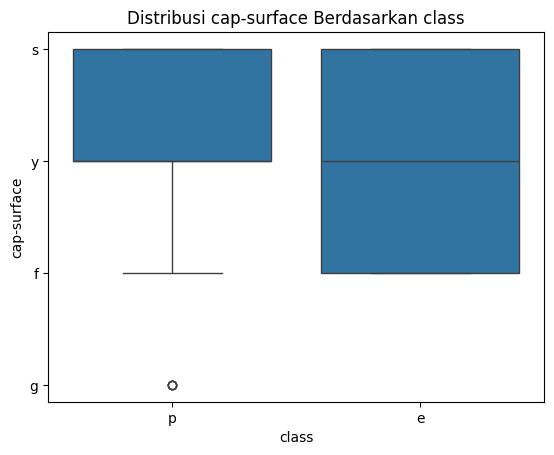

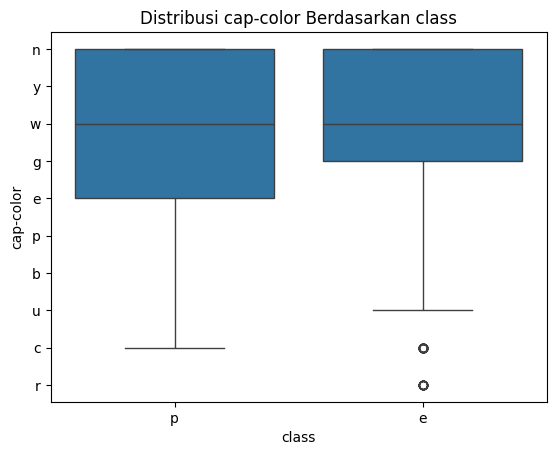

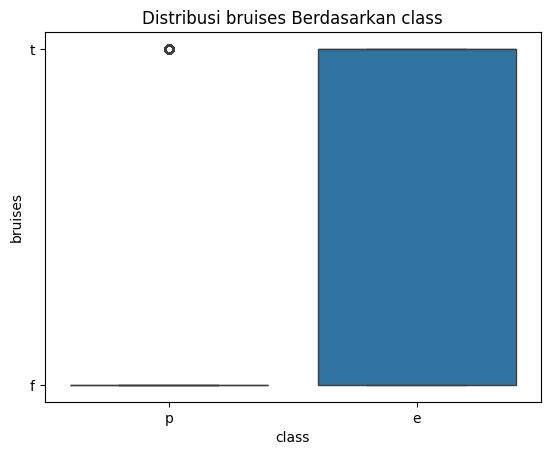

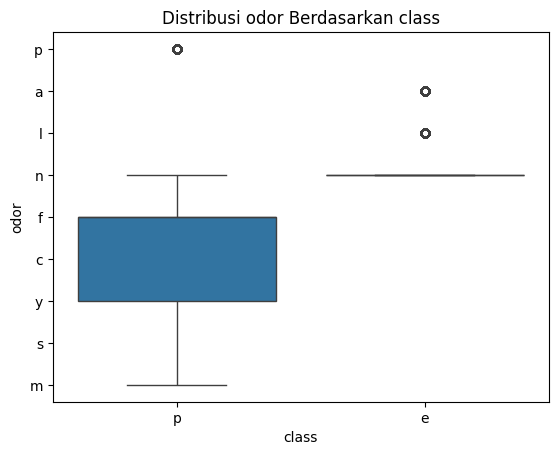

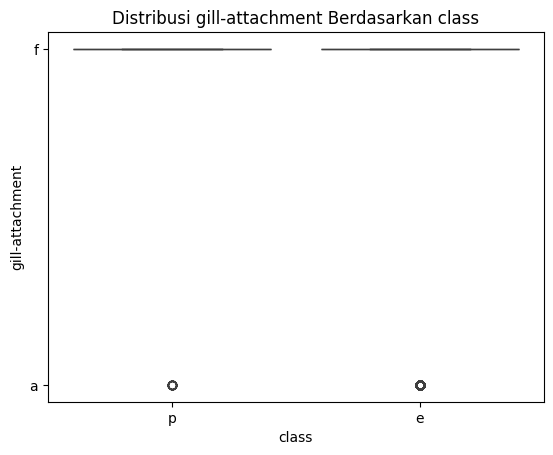

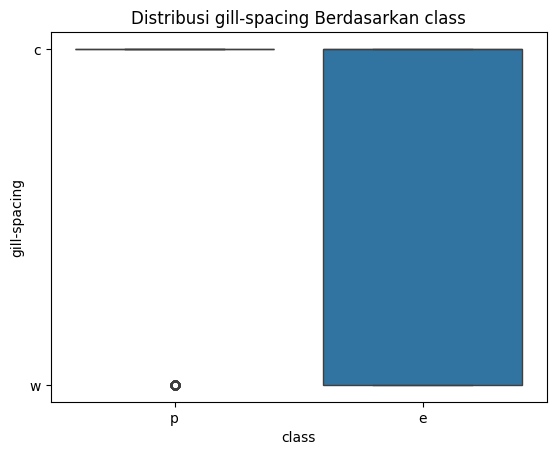

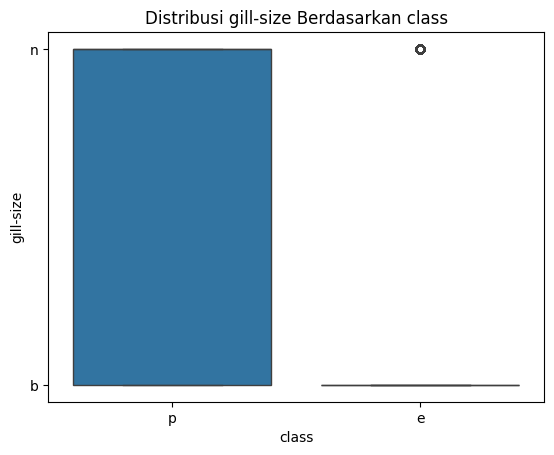

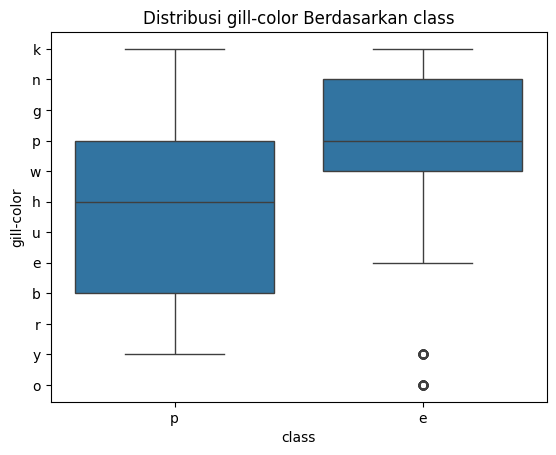

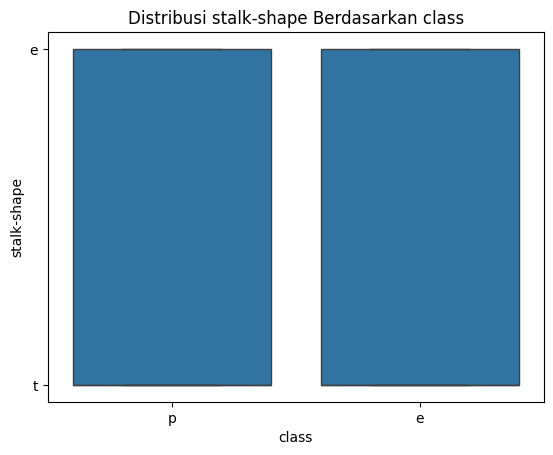

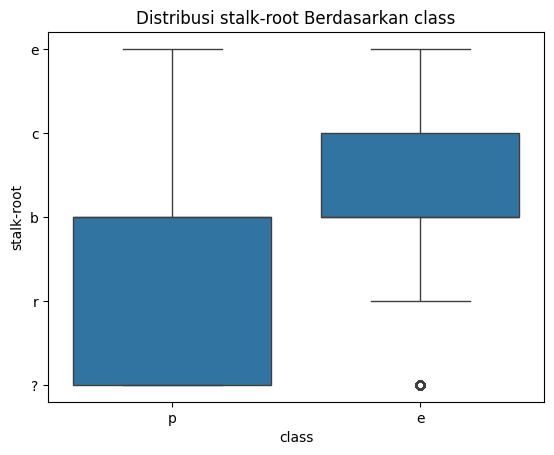

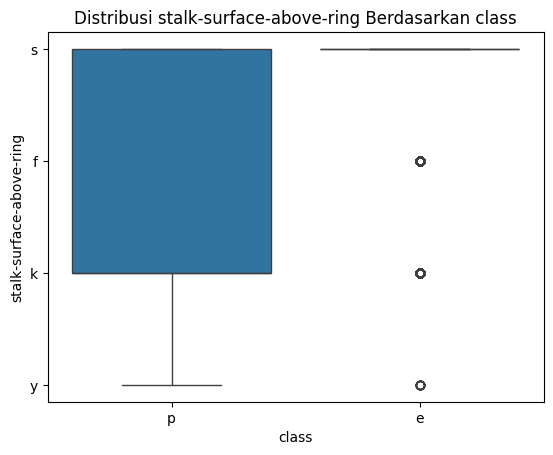

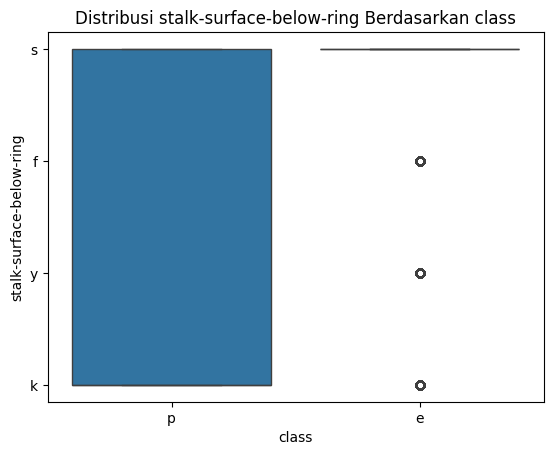

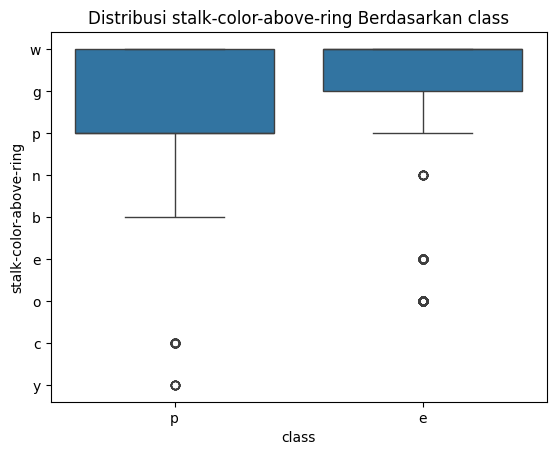

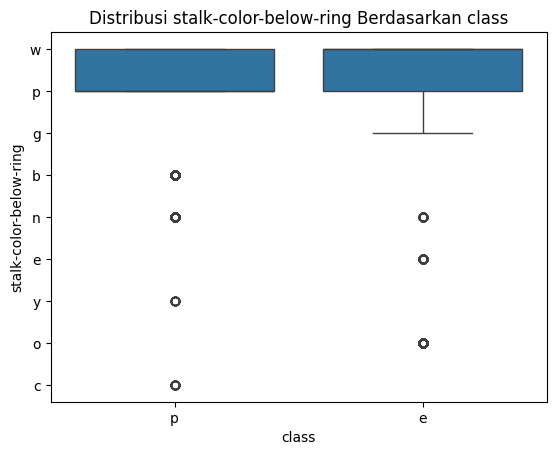

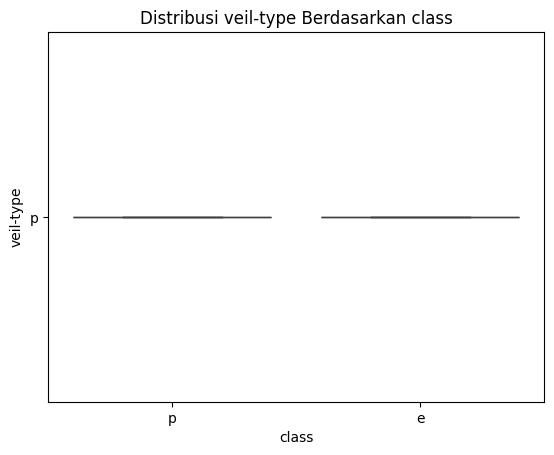

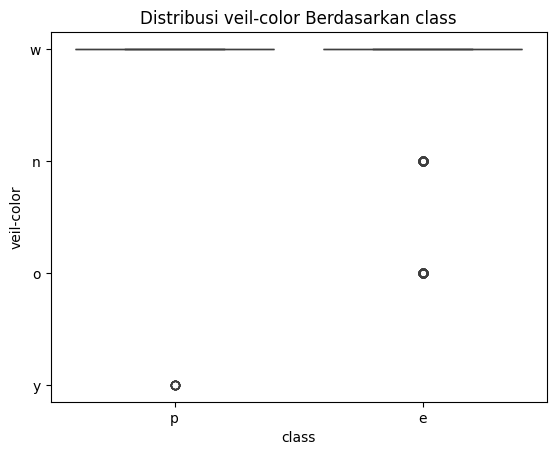

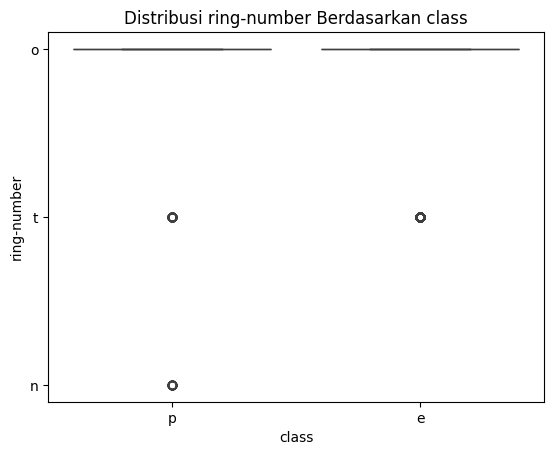

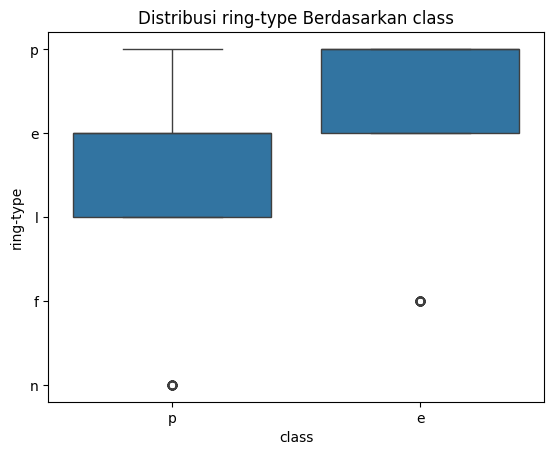

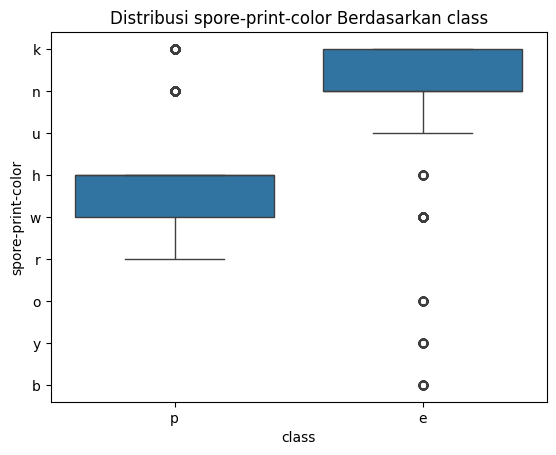

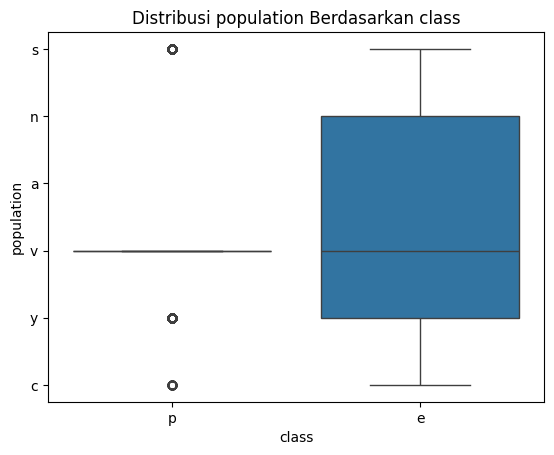

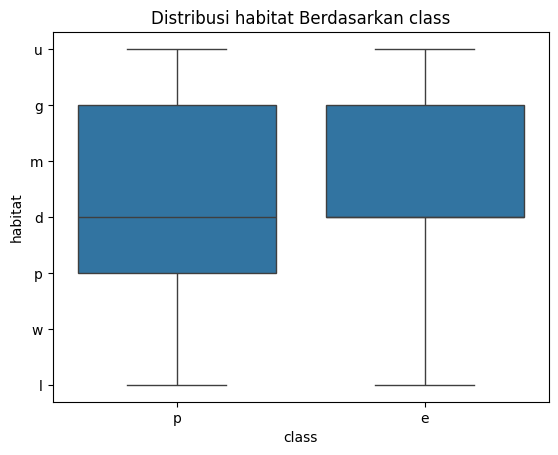

In [436]:
for col in columns:
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Distribusi {col} Berdasarkan class')
    plt.show()

Banyak sekali outlier, tapi ini variasi nyata dari kondisi sebenarnya.

## 4. Persiapan Data (Data Preparation)
Menangani data yang hilang (missing values) dan melakukan pengkodean (encoding) variabel kategorikal.
Normalisasi atau standarisasi variabel numerik jika diperlukan.
Pembagian data menjadi training set dan test set untuk membangun model dan mengevaluasi performanya pada data yang tidak terlihat.

In [437]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

mengisi kolom numerik dengan median agar tidak terpengaruh outlier

In [438]:
df.fillna(df.median(numeric_only=True), inplace=True)

Mengisi Gender, Self_Employed, dan Dependents dengan modus, yang paling banyak muncul.

In [439]:
for col in categorical:
	df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18004\174764187.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [440]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

pengkodean (encoding) variabel kategorikal menggunakan One-Hot Encoding, untuk menghindari hubungan ordinal antar kategori:

In [441]:
# One-hot encode the categorical features (excluding the target 'class')
df_encoded = pd.get_dummies(df, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises'], drop_first=True)
df_encoded.head(10)

,class,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t
0,p,p,f,c,n,k,e,e,s,s,...,False,False,False,True,False,False,False,False,False,True
1,e,a,f,c,b,k,e,c,s,s,...,False,False,False,False,False,False,False,False,True,True
2,e,l,f,c,b,n,e,c,s,s,...,False,False,False,False,False,False,False,True,False,True
3,p,p,f,c,n,n,e,e,s,s,...,False,False,False,False,False,False,False,True,False,True
4,e,n,f,w,b,k,t,e,s,s,...,False,False,True,False,False,False,False,False,False,False
5,e,a,f,c,b,n,e,c,s,s,...,False,False,False,False,False,False,False,False,True,True
6,e,a,f,c,b,g,e,c,s,s,...,False,False,False,False,False,False,False,True,False,True
7,e,l,f,c,b,n,e,c,s,s,...,False,False,False,False,False,False,False,True,False,True
8,p,p,f,c,n,p,e,e,s,s,...,False,False,False,False,False,False,False,True,False,True
9,e,a,f,c,b,g,e,c,s,s,...,False,False,False,False,False,False,False,False,True,True


Cek distribusi normal:

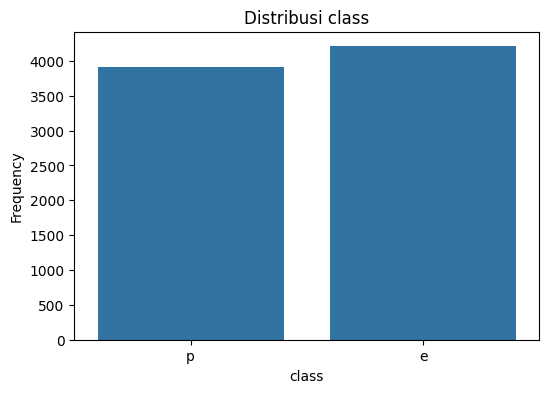

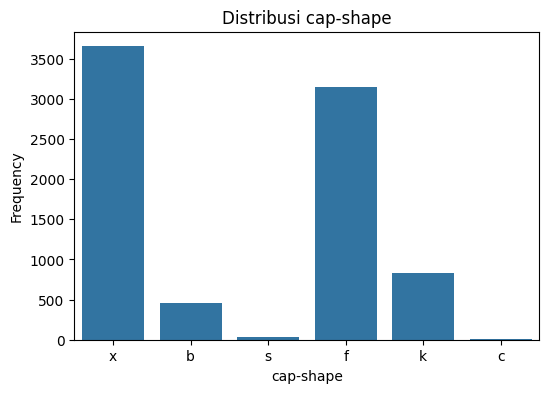

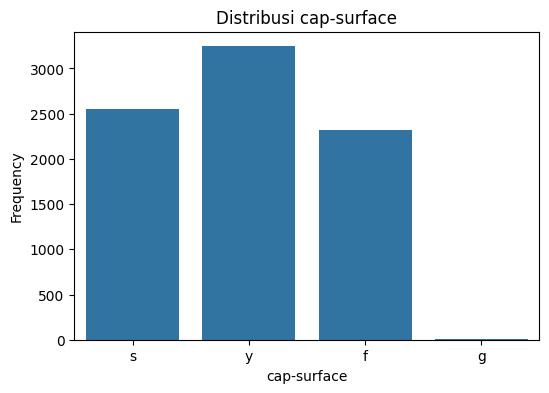

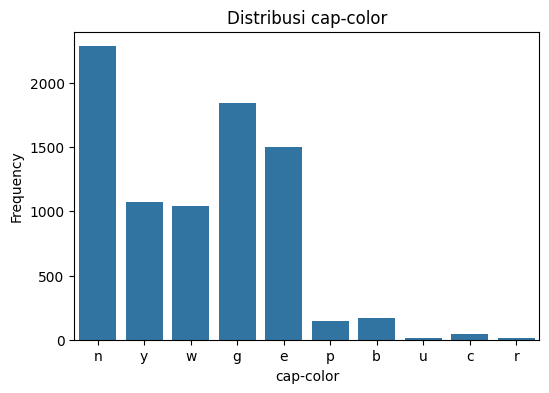

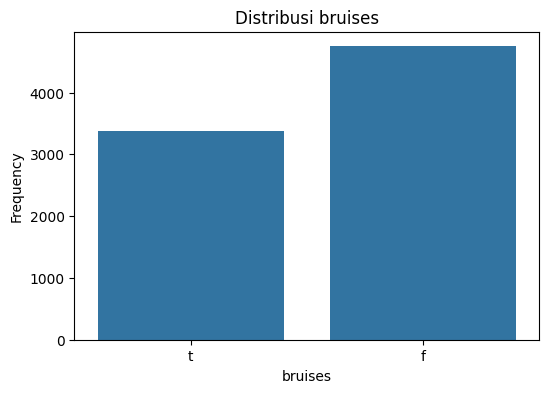

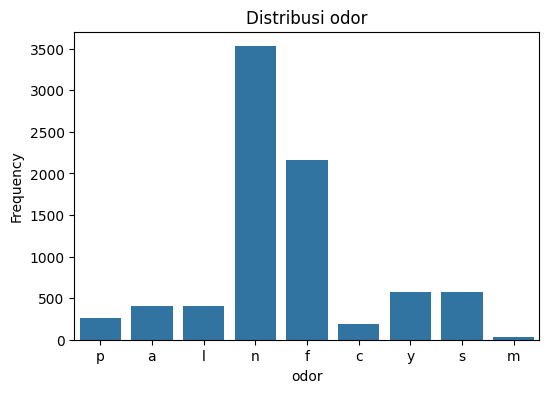

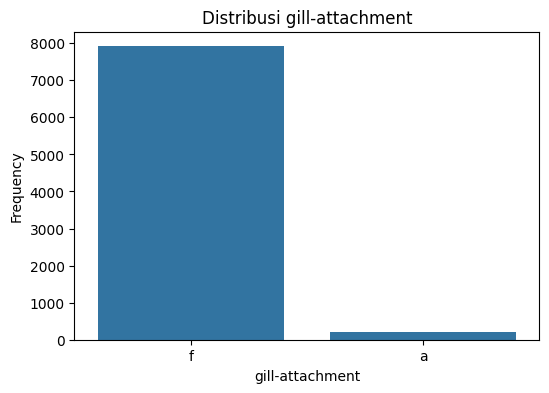

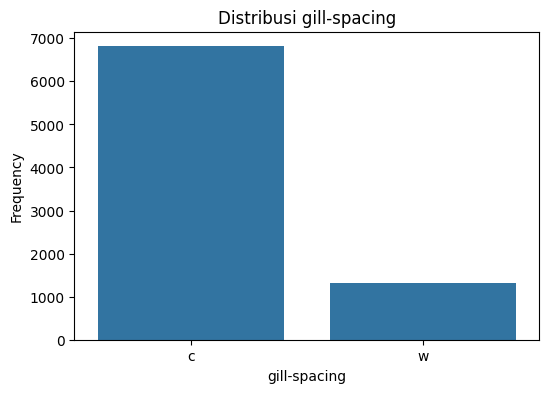

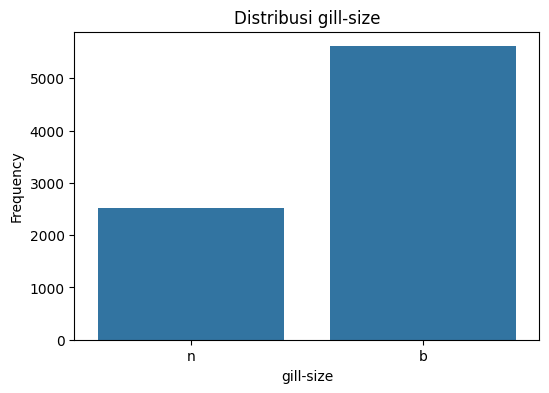

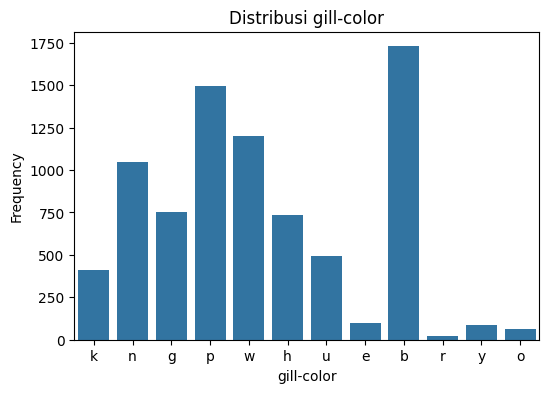

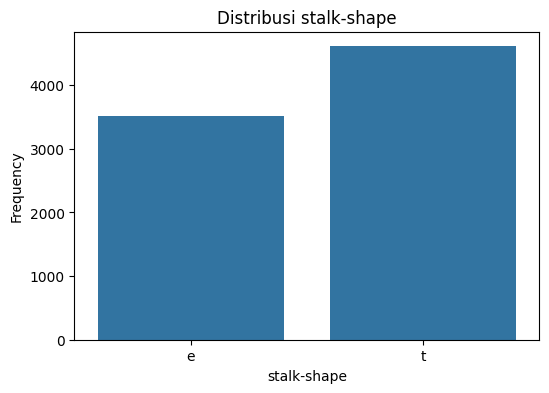

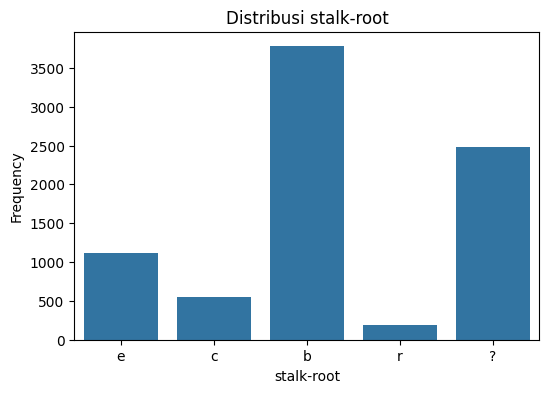

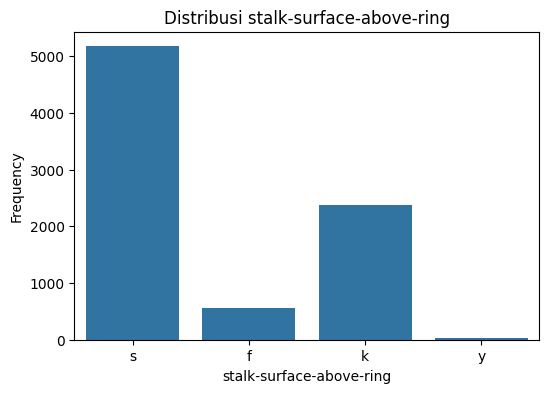

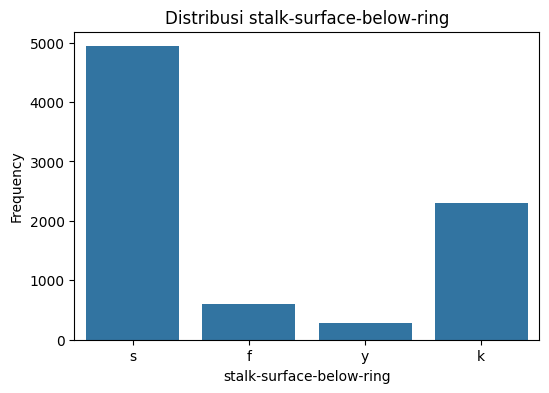

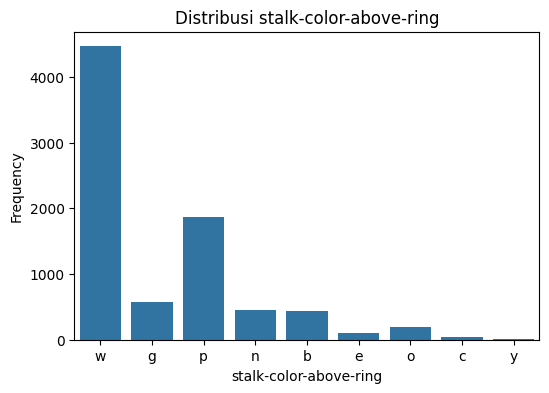

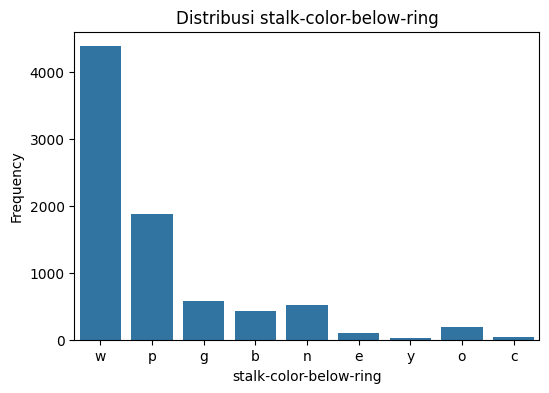

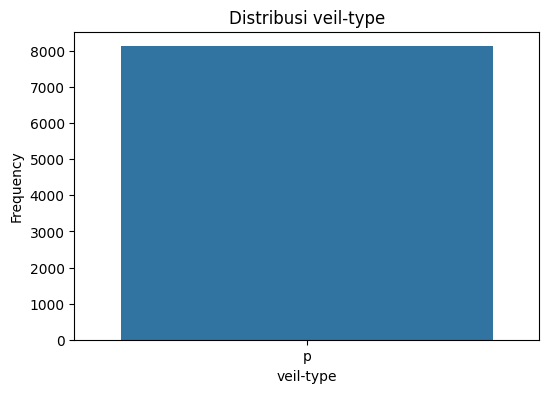

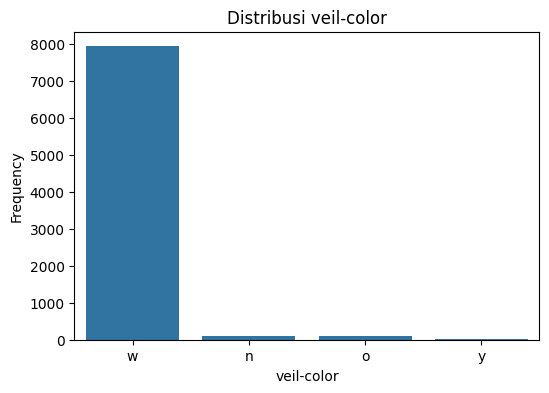

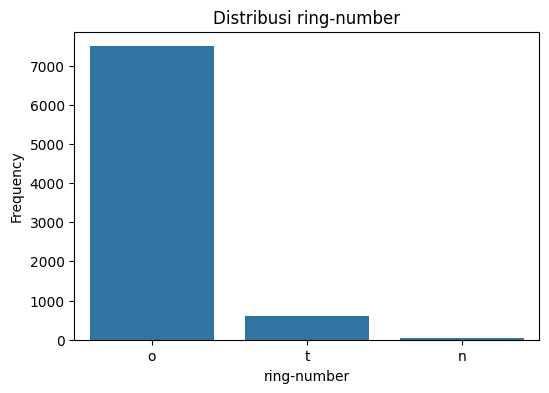

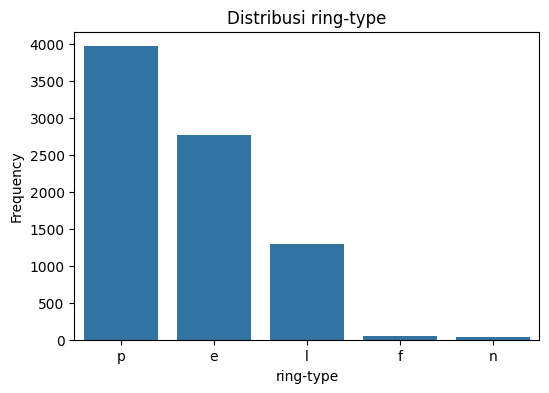

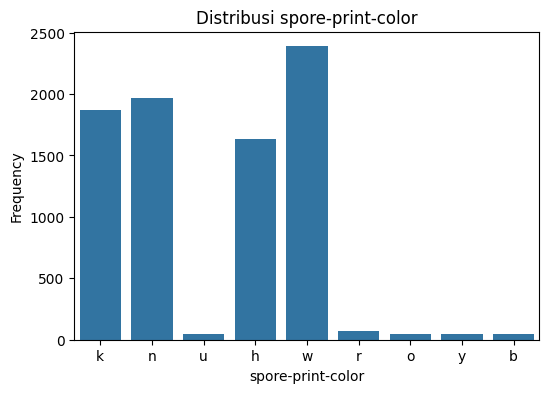

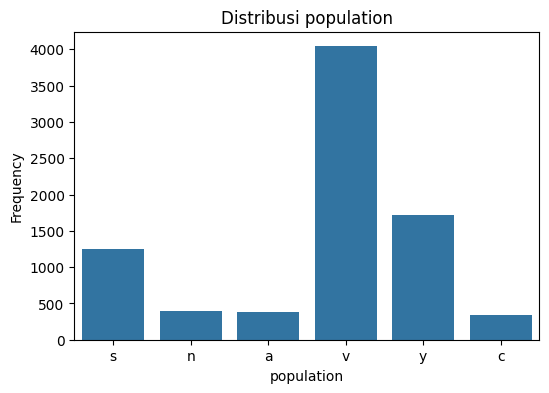

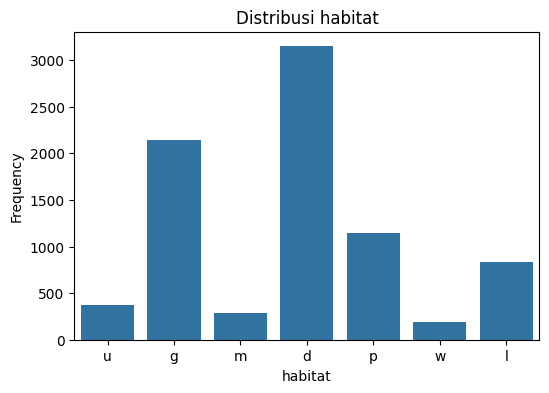

In [442]:
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Karena distribusi tidak normal, dan perbedaan skala besar (diawal), maka akan dilakukan normalisasi

## 5. Pemodelan (Modeling)


saya membagi 70% untuk training dan 30% untuk testing, 

menggunakan 0.3 memberikan lebih banyak data untuk pengujian, sehingga hasil evaluasi lebih dapat diandalkan dan mencerminkan kemampuan model dengan lebih baik, dan menghindari overfitting (kondisi di mana model terlalu fokus pada data pelatihan, sehingga kehilangan kemampuan untuk memprediksi dengan baik pada data yang baru). 

saya sudah mencoba menggunakan 20% untuk testing, tapi evaluasi menunjukkan hasil lebih baik di 30% heheh

In [443]:
from sklearn.preprocessing import LabelEncoder as LE
columns = df.columns
for i in columns:
    df[i] = LE().fit_transform(df[i])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [444]:
# Memisahkan variabel independen dan dependen untuk dataset jamur
X = df.drop(columns=['class'])  # Semua fitur kecuali target
y = df['class']

# Membagi data menjadi training dan test set (70% untuk training, 30% untuk testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [445]:
# Check the data types and unique values
print("X_train shape:", X_train.shape)
print("X_train dtypes:")
print(X_train.dtypes)
print("\ny_train unique values:", y_train.unique())
print("y_train dtype:", y_train.dtype)

X_train shape: (5686, 22)
X_train dtypes:
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

y_train unique values: [1 0]
y_train dtype: int64


In [446]:
# fungsi confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Tidak Beracun', 'Beracun'], 
                yticklabels=['Tidak Beracun', 'Beracun'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix untuk {model_name}')
    plt.show()

In [447]:
# 1. Model K-Nearest Neighbors (KNN)


## 6. Evaluasi Model (Model Evaluation)

# REVISI 
setelah revisi soal

Menggunakan model KNN, Naive Bayes, & SVM.

In [448]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Saya jadikan fungsi saja, fungsi evaluasi yang juga memanggil fungsi confusion matrix diatas tadi.

In [449]:
def evaluate_model(model, model_name):
    predictions = model.predict(X_test)
    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi: {accuracy_score(y_test, predictions):.2f}")
    print(f"Precision: {precision_score(y_test, predictions):.2f}")
    print(f"Recall: {recall_score(y_test, predictions):.2f}")
    print(f"F1-score: {f1_score(y_test, predictions):.2f}")
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, predictions, model_name)
    print("\n")

Evaluasi Model: K-Nearest Neighbors
Akurasi: 1.00
Precision: 0.99
Recall: 1.00
F1-score: 1.00
Confusion Matrix:


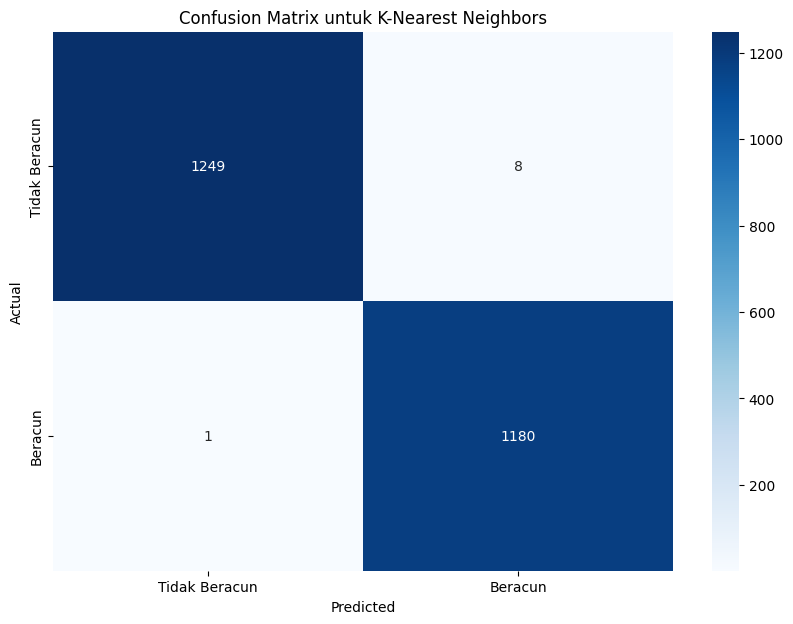

In [450]:
# 1. Model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, "K-Nearest Neighbors")

Evaluasi Model: Naive Bayes
Akurasi: 0.93
Precision: 0.93
Recall: 0.93
F1-score: 0.93
Confusion Matrix:


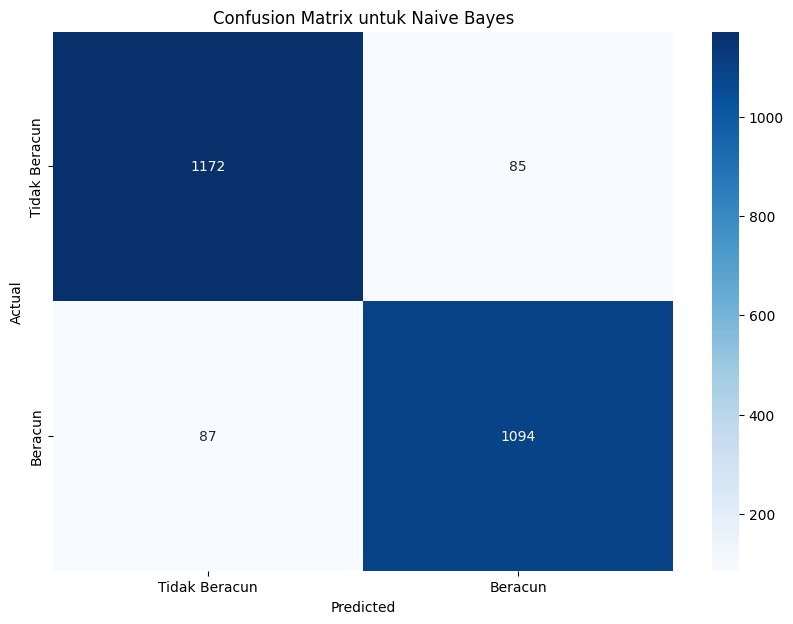

In [451]:
# 2. Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, "Naive Bayes")

Evaluasi Model: Support Vector Machine
Akurasi: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96
Confusion Matrix:


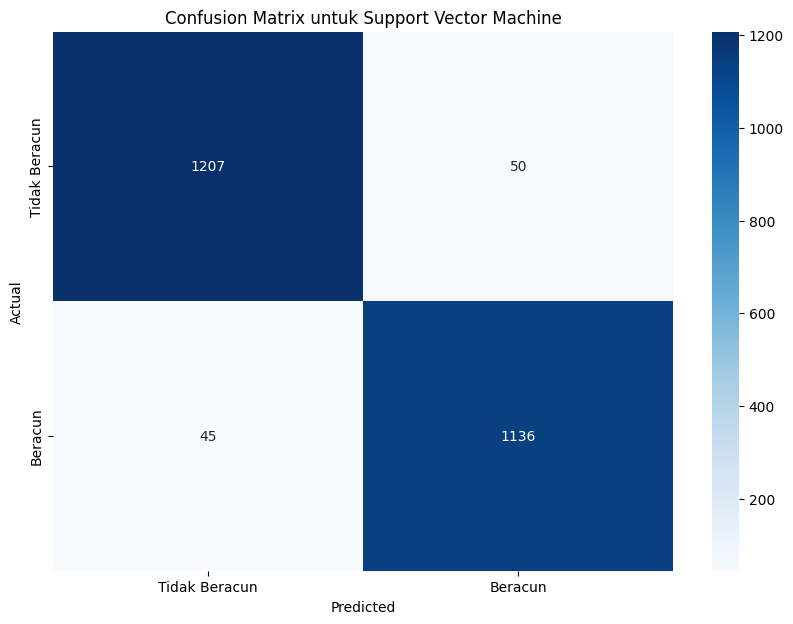

In [452]:
# 3. Model Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, "Support Vector Machine")

### Kesimpulan

### Terima kasih